In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("./Dataset/phl_exoplanet_catalog_2019.csv")

In [2]:
df.head()

,P_NAME,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,11 Com b,3.0,6165.86330,-476.74200,476.74200,NaN,NaN,NaN,2007,2014-05-14,...,0,Hot,0,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709,6165.86330,1.29
1,11 UMi b,3.0,4684.78480,-794.57001,794.57001,NaN,NaN,NaN,2009,2018-09-06,...,0,Hot,0,0.082414,Ursa Minor,UMi,Little Bear,12.229641,4684.78480,1.53
2,14 And b,3.0,1525.57440,NaN,NaN,NaN,NaN,NaN,2008,2014-05-14,...,0,Hot,0,0.081917,Andromeda,And,Andromeda,12.848516,1525.57440,0.83
3,14 Her b,3.0,1481.07850,-47.67420,47.67420,NaN,NaN,NaN,2002,2018-09-06,...,0,Cold,0,0.145241,Hercules,Her,Hercules,12.865261,1481.07850,2.93
4,16 Cyg B b,3.0,565.73385,-25.42624,25.42624,NaN,NaN,NaN,1996,2018-09-06,...,1,Warm,0,0.368627,Cygnus,Cyg,Swan,13.421749,565.73385,1.66


In [3]:
df.shape

(4048, 112)

In [4]:
df.columns

Index(['P_NAME', 'P_STATUS', 'P_MASS', 'P_MASS_ERROR_MIN', 'P_MASS_ERROR_MAX',
       'P_RADIUS', 'P_RADIUS_ERROR_MIN', 'P_RADIUS_ERROR_MAX', 'P_YEAR',
       'P_UPDATED',
       ...
       'P_HABZONE_CON', 'P_TYPE_TEMP', 'P_HABITABLE', 'P_ESI',
       'S_CONSTELLATION', 'S_CONSTELLATION_ABR', 'S_CONSTELLATION_ENG',
       'P_RADIUS_EST', 'P_MASS_EST', 'P_SEMI_MAJOR_AXIS_EST'],
      dtype='object', length=112)

In [5]:
df.to_csv("./Dataset/step0_raw_original.csv", index=False)

In [6]:
df['P_HABITABLE'].value_counts(normalize=True) * 100

P_HABITABLE
0    98.641304
2     0.839921
1     0.518775
Name: proportion, dtype: float64

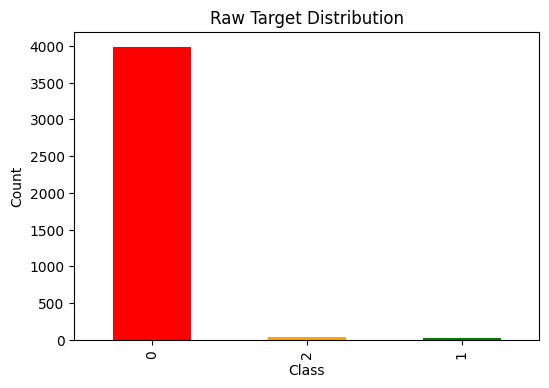

In [7]:
target_col = "P_HABITABLE"
plt.figure(figsize=(6,4))
df[target_col].value_counts().plot(kind="bar", color=["red","orange","green"])
plt.title("Raw Target Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [8]:
df.dtypes

P_NAME                    object
P_STATUS                 float64
P_MASS                   float64
P_MASS_ERROR_MIN         float64
P_MASS_ERROR_MAX         float64
                          ...   
S_CONSTELLATION_ABR       object
S_CONSTELLATION_ENG       object
P_RADIUS_EST             float64
P_MASS_EST               float64
P_SEMI_MAJOR_AXIS_EST    float64
Length: 112, dtype: object

In [9]:
missing_count = df.isnull().sum()
missing_count.sort_values(ascending=False)

P_DETECTION_MASS    4048
P_GEO_ALBEDO        4048
S_MAGNETIC_FIELD    4048
S_DISC              4048
P_ATMOSPHERE        4048
                    ... 
S_DEC                  0
P_STATUS               0
S_ALT_NAMES            0
S_DEC_T                0
P_NAME                 0
Length: 112, dtype: int64

In [10]:
missing_percent = (missing_count / len(df)) * 100
missing_percent.sort_values(ascending=False)

P_DETECTION_MASS    100.0
P_GEO_ALBEDO        100.0
S_MAGNETIC_FIELD    100.0
S_DISC              100.0
P_ATMOSPHERE        100.0
                    ...  
S_DEC                 0.0
P_STATUS              0.0
S_ALT_NAMES           0.0
S_DEC_T               0.0
P_NAME                0.0
Length: 112, dtype: float64

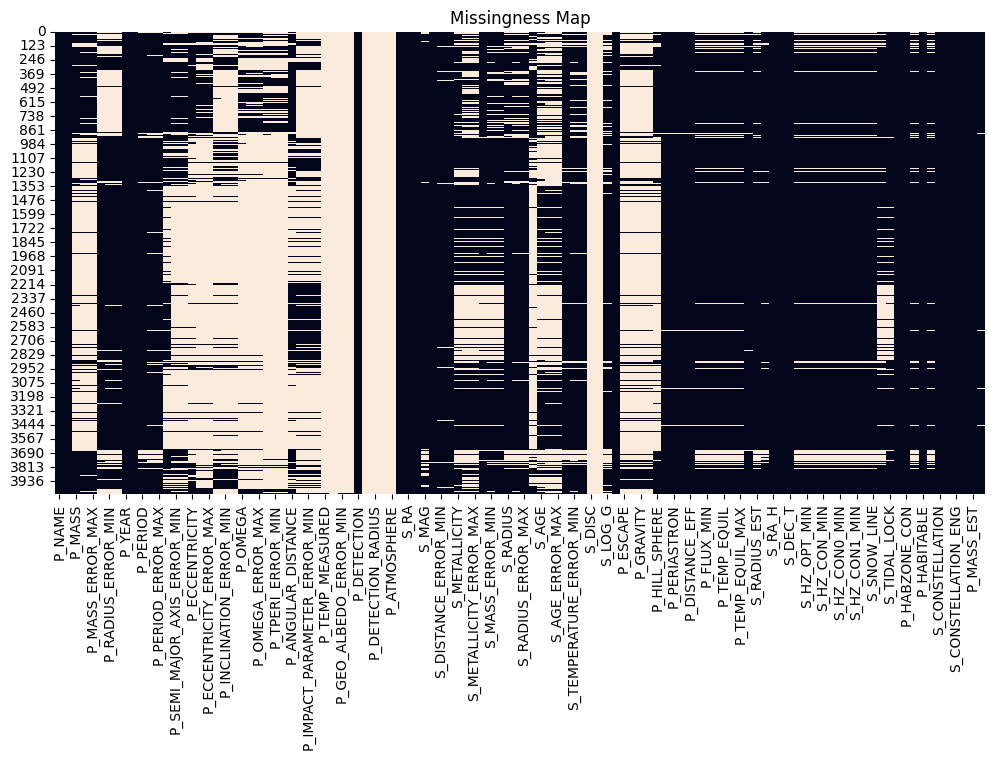

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missingness Map")
plt.show()

In [12]:
cols_to_drop = missing_percent[missing_percent > 75].index
cols_to_drop

Index(['P_ECCENTRICITY_ERROR_MIN', 'P_ECCENTRICITY_ERROR_MAX', 'P_INCLINATION',
       'P_INCLINATION_ERROR_MIN', 'P_INCLINATION_ERROR_MAX', 'P_OMEGA',
       'P_OMEGA_ERROR_MIN', 'P_OMEGA_ERROR_MAX', 'P_TPERI',
       'P_TPERI_ERROR_MIN', 'P_TPERI_ERROR_MAX', 'P_TEMP_MEASURED',
       'P_GEO_ALBEDO', 'P_GEO_ALBEDO_ERROR_MIN', 'P_GEO_ALBEDO_ERROR_MAX',
       'P_DETECTION_MASS', 'P_DETECTION_RADIUS', 'P_ALT_NAMES', 'P_ATMOSPHERE',
       'S_DISC', 'S_MAGNETIC_FIELD', 'P_ESCAPE', 'P_POTENTIAL', 'P_GRAVITY',
       'P_DENSITY'],
      dtype='object')

In [13]:
df_clean = df.drop(columns=cols_to_drop)
df_clean.shape

(4048, 87)

In [14]:
num_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df_clean.select_dtypes(include=['object']).columns

len(num_cols), len(cat_cols)

(73, 14)

In [15]:
df_clean[num_cols].describe()

,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_PERIOD,P_PERIOD_ERROR_MIN,...,S_SNOW_LINE,S_ABIO_ZONE,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_HABITABLE,P_ESI,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
count,4048.0,1598.000000,1467.000000,1467.000000,3139.000000,3105.000000,3105.000000,4048.000000,3.938000e+03,3.807000e+03,...,3786.000000,3.083000e+03,3281.000000,4048.000000,4048.000000,4048.000000,3721.000000,4048.000000,4048.000000,3978.000000
mean,3.0,798.384920,-152.292232,190.289692,4.191426,-0.483990,0.621867,2014.212945,2.309342e+03,-1.073631e+03,...,3.513348,1.768991e+35,0.440103,0.049654,0.034091,0.021986,0.261252,5.588647,323.089993,4.011385
std,0.0,1406.808654,783.366353,1082.061976,4.776830,1.409048,2.007592,3.704839,1.167012e+05,5.943181e+04,...,5.463171,6.944274e+36,0.074285,0.217256,0.181485,0.195731,0.131333,5.392733,965.084290,62.389968
min,3.0,0.019070,-24965.390000,0.000000,0.336300,-54.592700,0.000000,1989.000000,9.070629e-02,-3.650000e+06,...,0.002405,7.293660e-05,0.030707,0.000000,0.000000,0.000000,0.006768,0.000000,0.000000,0.004400
25%,3.0,26.548968,-79.457001,4.449592,1.569400,-0.526870,0.145730,2014.000000,4.497336e+00,-1.129000e-03,...,1.740762,5.264169e-01,0.420337,0.000000,0.000000,0.000000,0.196982,1.703920,3.628101,0.053000
50%,3.0,273.332080,-24.154928,25.108412,2.331680,-0.235410,0.325090,2016.000000,1.187053e+01,-9.392000e-05,...,2.568600,1.429118e+00,0.448357,0.000000,0.000000,0.000000,0.271192,2.667980,7.815324,0.102199
75%,3.0,806.488560,-4.392383,85.813561,3.553570,-0.134520,0.661390,2016.000000,4.186661e+01,-1.594000e-05,...,3.661581,2.641037e+00,0.472140,0.000000,0.000000,0.000000,0.303346,11.770500,149.379160,0.260507
max,3.0,17668.059000,0.270000,26630.808000,77.349000,0.450000,68.919080,2019.000000,7.300000e+06,3.200000e-02,...,104.112780,2.726899e+38,1.322542,1.000000,1.000000,2.000000,0.931208,77.349000,17668.059000,2500.000000


In [16]:
df_clean[cat_cols].nunique().sort_values(ascending=False)

P_NAME                 4048
S_NAME                 3010
S_RA_T                 3010
S_DEC_T                3010
S_ALT_NAMES             584
S_TYPE                  210
P_UPDATED               184
S_CONSTELLATION          88
S_CONSTELLATION_ABR      88
S_CONSTELLATION_ENG      88
P_DETECTION              10
S_TYPE_TEMP               7
P_TYPE                    6
P_TYPE_TEMP               3
dtype: int64

In [17]:
df_clean.to_csv(
    './Dataset/phl_exoplanet_after_basic_eda.csv',
    index=False
)

In [18]:
num_cols = num_cols.drop('P_HABITABLE', errors='ignore')

num_cols

Index(['P_STATUS', 'P_MASS', 'P_MASS_ERROR_MIN', 'P_MASS_ERROR_MAX',
       'P_RADIUS', 'P_RADIUS_ERROR_MIN', 'P_RADIUS_ERROR_MAX', 'P_YEAR',
       'P_PERIOD', 'P_PERIOD_ERROR_MIN', 'P_PERIOD_ERROR_MAX',
       'P_SEMI_MAJOR_AXIS', 'P_SEMI_MAJOR_AXIS_ERROR_MIN',
       'P_SEMI_MAJOR_AXIS_ERROR_MAX', 'P_ECCENTRICITY', 'P_ANGULAR_DISTANCE',
       'P_IMPACT_PARAMETER', 'P_IMPACT_PARAMETER_ERROR_MIN',
       'P_IMPACT_PARAMETER_ERROR_MAX', 'S_RA', 'S_DEC', 'S_MAG', 'S_DISTANCE',
       'S_DISTANCE_ERROR_MIN', 'S_DISTANCE_ERROR_MAX', 'S_METALLICITY',
       'S_METALLICITY_ERROR_MIN', 'S_METALLICITY_ERROR_MAX', 'S_MASS',
       'S_MASS_ERROR_MIN', 'S_MASS_ERROR_MAX', 'S_RADIUS',
       'S_RADIUS_ERROR_MIN', 'S_RADIUS_ERROR_MAX', 'S_AGE', 'S_AGE_ERROR_MIN',
       'S_AGE_ERROR_MAX', 'S_TEMPERATURE', 'S_TEMPERATURE_ERROR_MIN',
       'S_TEMPERATURE_ERROR_MAX', 'S_LOG_G', 'P_HILL_SPHERE', 'P_DISTANCE',
       'P_PERIASTRON', 'P_APASTRON', 'P_DISTANCE_EFF', 'P_FLUX', 'P_FLUX_MIN',
       'P_FL

In [19]:
Q1 = df_clean[num_cols].quantile(0.25)
Q3 = df_clean[num_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_mask = (
    (df_clean[num_cols] < (Q1 - 1.5 * IQR)) |
    (df_clean[num_cols] > (Q3 + 1.5 * IQR))
)

outlier_counts = outlier_mask.sum().sort_values(ascending=False)
outlier_counts

P_PERIOD_ERROR_MIN              798
P_PERIOD_ERROR_MAX              794
P_MASS_EST                      715
P_APASTRON                      695
P_PERIOD                        691
                               ... 
P_IMPACT_PARAMETER_ERROR_MAX      5
P_RADIUS_EST                      3
P_IMPACT_PARAMETER                2
S_AGE_ERROR_MAX                   1
P_STATUS                          0
Length: 72, dtype: int64

In [20]:
# IQR Capping 

df_outlier_fixed = df_clean.copy()

for col in num_cols:
    lower = Q1[col] - 1.5 * IQR[col]
    upper = Q3[col] + 1.5 * IQR[col]

    df_outlier_fixed[col] = df_outlier_fixed[col].clip(lower, upper)


In [21]:
skewness = df_outlier_fixed[num_cols].skew().sort_values(ascending=False)
skewness.head(10)

P_HILL_SPHERE                  1.270102
S_DISTANCE_ERROR_MAX           1.244766
P_MASS_EST                     1.230766
S_RADIUS_ERROR_MAX             1.229350
P_SEMI_MAJOR_AXIS_ERROR_MAX    1.229038
P_MASS_ERROR_MAX               1.216073
P_FLUX_MAX                     1.211727
P_SEMI_MAJOR_AXIS              1.210902
P_FLUX                         1.206222
P_ANGULAR_DISTANCE             1.203781
dtype: float64

In [23]:
skewed_cols = skewness[skewness > 1].index

for col in skewed_cols:
    df_outlier_fixed[col] = np.log1p(df_outlier_fixed[col])

In [24]:
df_outlier_fixed.to_csv(
    './Dataset/phl_exoplanet_after_outliers.csv',
    index=False
)

In [25]:
cat_cols = df_outlier_fixed.select_dtypes(include=['object']).columns
cat_cols

Index(['P_NAME', 'P_UPDATED', 'P_DETECTION', 'S_NAME', 'S_TYPE', 'S_ALT_NAMES',
       'P_TYPE', 'S_TYPE_TEMP', 'S_RA_T', 'S_DEC_T', 'P_TYPE_TEMP',
       'S_CONSTELLATION', 'S_CONSTELLATION_ABR', 'S_CONSTELLATION_ENG'],
      dtype='object')

In [26]:
for col in cat_cols:
    print(f"\n{col}")
    print(df_outlier_fixed[col].value_counts().head(10))


P_NAME
P_NAME
11 Com b        1
Kepler-336 c    1
Kepler-331 c    1
Kepler-331 d    1
Kepler-332 b    1
Kepler-332 c    1
Kepler-332 d    1
Kepler-333 b    1
Kepler-333 c    1
Kepler-334 b    1
Name: count, dtype: int64

P_UPDATED
P_UPDATED
2016-05-10    1282
2014-05-14    1048
2018-09-06     152
2018-04-26     105
2018-10-26      89
2018-12-06      69
2018-02-15      53
2018-07-12      44
2016-07-18      44
2019-06-13      43
Name: count, dtype: int64

P_DETECTION
P_DETECTION
Transit                          3114
Radial Velocity                   765
Microlensing                       78
Imaging                            47
Transit Timing Variations          18
Eclipse Timing Variations          11
Orbital Brightness Modulation       6
Pulsar Timing                       6
Pulsation Timing Variations         2
Astrometry                          1
Name: count, dtype: int64

S_NAME
S_NAME
Kepler-90     8
TRAPPIST-1    7
Kepler-11     6
Kepler-80     6
HD 219134     6
HD 34445      6


In [27]:
df_cat_clean = df_outlier_fixed.copy()

for col in cat_cols:
    df_cat_clean[col] = (
        df_cat_clean[col]
        .astype(str)
        .str.strip()
        .str.upper()
    )

In [28]:
df_cat_clean[cat_cols].nunique().sort_values(ascending=False)

P_NAME                 4048
S_NAME                 3010
S_RA_T                 3010
S_DEC_T                3010
S_ALT_NAMES             584
S_TYPE                  211
P_UPDATED               184
S_CONSTELLATION          88
S_CONSTELLATION_ABR      88
S_CONSTELLATION_ENG      88
P_DETECTION              10
S_TYPE_TEMP               8
P_TYPE                    7
P_TYPE_TEMP               4
dtype: int64

In [30]:
y = df_cat_clean['P_HABITABLE']
X = df_cat_clean.drop(columns=['P_HABITABLE'])

In [46]:
# One-Hot Encode
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=False)

# Identify numeric and dummy (0/1) columns
num_cols_after = X_encoded.select_dtypes(include=['int64','float64']).columns
dummy_cols = [c for c in X_encoded.columns if c not in num_cols_after]

# Impute numeric features with median
for col in num_cols_after:
    median_val = X_encoded[col].median()
    X_encoded[col] = X_encoded[col].fillna(median_val)

# Impute dummy (categorical) features with mode
for col in dummy_cols:
    mode_val = X_encoded[col].mode()[0]
    X_encoded[col] = X_encoded[col].fillna(mode_val)

# Confirm no remaining NaNs
print("Remaining NaNs after final imputation:", X_encoded.isna().sum().sum())

Remaining NaNs after final imputation: 0


In [47]:
X_encoded.shape

(4048, 14422)

In [48]:
X_encoded.head()

,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_PERIOD,P_PERIOD_ERROR_MIN,...,S_CONSTELLATION_ENG_TOUCAN,S_CONSTELLATION_ENG_TRIANGLE,S_CONSTELLATION_ENG_TWINS,S_CONSTELLATION_ENG_UNICORN,S_CONSTELLATION_ENG_VIRGIN,S_CONSTELLATION_ENG_WATER CARRIER,S_CONSTELLATION_ENG_WATER SNAKE,S_CONSTELLATION_ENG_WHALE,S_CONSTELLATION_ENG_WINGED HORSE,S_CONSTELLATION_ENG_WOLF
0,3.0,2.150545,-192.053928,1.847141,2.33168,-0.23541,0.248016,2011,1.721751,-0.002799,...,False,False,False,False,False,False,False,False,False,False
1,3.0,2.150545,-192.053928,1.847141,2.33168,-0.23541,0.248016,2011,1.721751,-0.002799,...,False,False,False,False,False,False,False,False,False,False
2,3.0,2.119957,-24.154928,1.449799,2.33168,-0.23541,0.248016,2011,1.721751,-0.002799,...,False,False,False,False,False,False,False,False,False,False
3,3.0,2.116400,-47.674200,1.586200,2.33168,-0.23541,0.248016,2011,1.721751,-0.002799,...,False,False,False,False,False,False,False,False,False,False
4,3.0,1.993324,-25.426240,1.452634,2.33168,-0.23541,0.248016,2011,1.721751,-0.002799,...,False,False,False,False,False,False,False,False,False,False


In [49]:
X_encoded.to_csv(
    './Dataset/phl_exoplanet_encoded_features.csv',
    index=False
)

y.to_csv(
    './Dataset/phl_exoplanet_target.csv',
    index=False
)

In [59]:
num_cols = X_encoded.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['P_STATUS', 'P_MASS', 'P_MASS_ERROR_MIN', 'P_MASS_ERROR_MAX',
       'P_RADIUS', 'P_RADIUS_ERROR_MIN', 'P_RADIUS_ERROR_MAX', 'P_YEAR',
       'P_PERIOD', 'P_PERIOD_ERROR_MIN', 'P_PERIOD_ERROR_MAX',
       'P_SEMI_MAJOR_AXIS', 'P_SEMI_MAJOR_AXIS_ERROR_MIN',
       'P_SEMI_MAJOR_AXIS_ERROR_MAX', 'P_ECCENTRICITY', 'P_ANGULAR_DISTANCE',
       'P_IMPACT_PARAMETER', 'P_IMPACT_PARAMETER_ERROR_MIN',
       'P_IMPACT_PARAMETER_ERROR_MAX', 'S_RA', 'S_DEC', 'S_MAG', 'S_DISTANCE',
       'S_DISTANCE_ERROR_MIN', 'S_DISTANCE_ERROR_MAX', 'S_METALLICITY',
       'S_METALLICITY_ERROR_MIN', 'S_METALLICITY_ERROR_MAX', 'S_MASS',
       'S_MASS_ERROR_MIN', 'S_MASS_ERROR_MAX', 'S_RADIUS',
       'S_RADIUS_ERROR_MIN', 'S_RADIUS_ERROR_MAX', 'S_AGE', 'S_AGE_ERROR_MIN',
       'S_AGE_ERROR_MAX', 'S_TEMPERATURE', 'S_TEMPERATURE_ERROR_MIN',
       'S_TEMPERATURE_ERROR_MAX', 'S_LOG_G', 'P_HILL_SPHERE', 'P_DISTANCE',
       'P_PERIASTRON', 'P_APASTRON', 'P_DISTANCE_EFF', 'P_FLUX', 'P_FLUX_MIN',
       'P_FL

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled_array = scaler.fit_transform(X_encoded[num_cols])

In [61]:
X_scaled = pd.DataFrame(
    X_scaled_array,
    columns=num_cols,
    index=X_encoded.index
)

In [62]:
X_final = X_scaled
X_final.describe().T[['mean', 'std']].head()

,mean,std
P_STATUS,0.000000e+00,0.000000
P_MASS,3.054210e-16,1.000124
P_MASS_ERROR_MIN,-3.510587e-17,1.000124
P_MASS_ERROR_MAX,3.756328e-16,1.000124
P_RADIUS,-7.021173e-17,1.000124


In [63]:
final_df = X_final.copy()
final_df['P_HABITABLE'] = y.values

final_df.to_csv(
    './Dataset/phl_exoplanet_preprocessed_no_sampling.csv',
    index=False
)

In [64]:
X_final.isna().sum().sum()

0

In [65]:
nan_cols = X_final.columns[X_final.isna().any()]
nan_cols

Index([], dtype='object')

In [66]:
X_final[nan_cols].isna().sum().sort_values(ascending=False)

Series([], dtype: float64)

In [67]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_final)

In [68]:
pca_df = pd.DataFrame(
    X_pca,
    columns=['PC1', 'PC2']
)

pca_df['P_HABITABLE'] = y.values

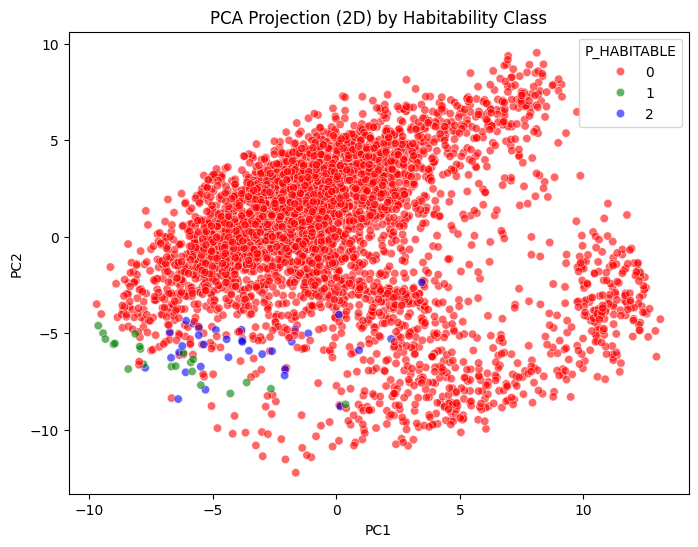

In [69]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=pca_df,
    x='PC1',
    y='PC2',
    hue='P_HABITABLE',
    palette={0: 'red', 1: 'green', 2: 'blue'},
    alpha=0.6
)
plt.title("PCA Projection (2D) by Habitability Class")
plt.show()

In [70]:
pca.explained_variance_ratio_

array([0.27522951, 0.21483256])

In [71]:
pca_df.to_csv(
    './Dataset/phl_exoplanet_pca_2d.csv',
    index=False
)

In [72]:
from sklearn.manifold import TSNE
tsne = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate=200,
    random_state=42
)

X_tsne = tsne.fit_transform(X_final)


In [73]:
tsne_df = pd.DataFrame(
    X_tsne,
    columns=['TSNE1', 'TSNE2']
)

tsne_df['P_HABITABLE'] = y.values


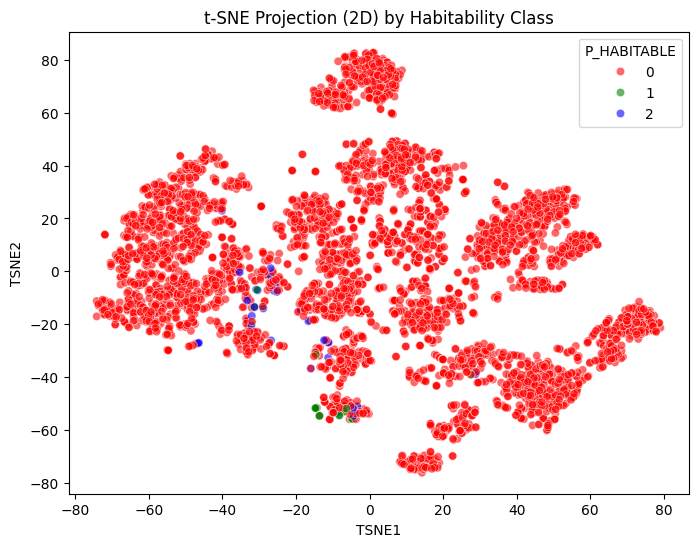

In [74]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=tsne_df,
    x='TSNE1',
    y='TSNE2',
    hue='P_HABITABLE',
    palette={0: 'red', 1: 'green', 2: 'blue'},
    alpha=0.6
)
plt.title("t-SNE Projection (2D) by Habitability Class")
plt.show()

In [75]:
tsne_df.to_csv(
    './Dataset/phl_exoplanet_tsne_2d.csv',
    index=False
)

In [76]:
from sklearn.model_selection import train_test_split

# Features and target
X = X_scaled
y = y

# Split (80% train, 20% test), stratify to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Sanity check
print("Training class distribution:\n", y_train.value_counts(normalize=True))
print("\nTesting class distribution:\n", y_test.value_counts(normalize=True))


Training class distribution:
 P_HABITABLE
0    0.986234
2    0.008472
1    0.005295
Name: proportion, dtype: float64

Testing class distribution:
 P_HABITABLE
0    0.986831
2    0.008230
1    0.004938
Name: proportion, dtype: float64


In [ ]:
# !pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

print("Before SMOTE:")
print(y_train.value_counts())

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit only on training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the new distribution
print("After SMOTE - Training class distribution:\n", y_train_smote.value_counts())

Before SMOTE:
P_HABITABLE
0    2794
2      24
1      15
Name: count, dtype: int64
After SMOTE - Training class distribution:
 P_HABITABLE
0    2794
1    2794
2    2794
Name: count, dtype: int64



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [79]:
train_smote_df = X_train_smote.copy()
train_smote_df['P_HABITABLE'] = y_train_smote.values
train_smote_df.to_csv('./Dataset/phl_exoplanet_train_smote.csv', index=False)

test_df = X_test.copy()
test_df['P_HABITABLE'] = y_test.values
test_df.to_csv('./Dataset/phl_exoplanet_test.csv', index=False)

In [81]:
from imblearn.over_sampling import BorderlineSMOTE

# Apply only on training data
bl_smote = BorderlineSMOTE(random_state=42)
X_train_bl, y_train_bl = bl_smote.fit_resample(X_train, y_train)

# Check distribution
print("Borderline-SMOTE class distribution:")
print(pd.Series(y_train_bl).value_counts())

# Save for reference
train_bl_resampled = pd.DataFrame(X_train_bl, columns=X_final.columns)
train_bl_resampled['P_HABITABLE'] = y_train_bl.values
train_bl_resampled.to_csv('./Dataset/phl_exoplanet_train_bl_smote.csv', index=False)


Borderline-SMOTE class distribution:
P_HABITABLE
0    2794
1    2794
2    2794
Name: count, dtype: int64


In [82]:
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(random_state=42)
X_train_st, y_train_st = smote_tomek.fit_resample(X_train, y_train)

print("SMOTE + Tomek Links class distribution:")
print(pd.Series(y_train_st).value_counts())

train_st_resampled = pd.DataFrame(X_train_st, columns=X_final.columns)
train_st_resampled['P_HABITABLE'] = y_train_st.values
train_st_resampled.to_csv('./Dataset/phl_exoplanet_train_smote_tomek.csv', index=False)


SMOTE + Tomek Links class distribution:
P_HABITABLE
0    2794
1    2794
2    2794
Name: count, dtype: int64


In [83]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)
X_train_ad, y_train_ad = adasyn.fit_resample(X_train, y_train)

print("ADASYN class distribution:")
print(pd.Series(y_train_ad).value_counts())

train_ad_resampled = pd.DataFrame(X_train_ad, columns=X_final.columns)
train_ad_resampled['P_HABITABLE'] = y_train_ad.values
train_ad_resampled.to_csv('./Dataset/phl_exoplanet_train_adasyn.csv', index=False)


ADASYN class distribution:
P_HABITABLE
0    2794
1    2793
2    2790
Name: count, dtype: int64


In [84]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_ru, y_train_ru = rus.fit_resample(X_train, y_train)

print("Random Undersampling class distribution:")
print(pd.Series(y_train_ru).value_counts())

train_ru_resampled = pd.DataFrame(X_train_ru, columns=X_final.columns)
train_ru_resampled['P_HABITABLE'] = y_train_ru.values
train_ru_resampled.to_csv('./Dataset/phl_exoplanet_train_rus.csv', index=False)


Random Undersampling class distribution:
P_HABITABLE
0    15
1    15
2    15
Name: count, dtype: int64


In [85]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Using class_weight='balanced' to handle imbalance
svm_clf = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm_clf.fit(X_train, y_train)  # Train on original imbalanced training set

y_pred_svm = svm_clf.predict(X_test)

print("SVM - Class-weighted")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM - Class-weighted
[[1188    2    9]
 [   2    3    1]
 [   7    0    3]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1199
           1       0.60      0.50      0.55         6
           2       0.23      0.30      0.26        10

    accuracy                           0.98      1215
   macro avg       0.61      0.60      0.60      1215
weighted avg       0.98      0.98      0.98      1215



In [ ]:
# !pip install xgboost

import xgboost as xgb

# Calculate scale_pos_weight = (#negative class) / (#positive class)
num_neg = (y_train==0).sum()
num_pos = (y_train==1).sum()
scale = num_neg / num_pos

xgb_clf = xgb.XGBClassifier(scale_pos_weight=scale, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)

y_pred_xgb = xgb_clf.predict(X_test)

print("XGBoost - scale_pos_weight")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/72.0 MB 5.6 MB/s eta 0:00:13
   - -------------------------------------- 1.8/72.0 MB 5.9 MB/s eta 0:00:12
   - -------------------------------------- 3.1/72.0 MB 6.4 MB/s eta 0:00:11
   -- ------------------------------------- 4.5/72.0 MB 6.4 MB/s eta 0:00:11
   --- ------------------------------------ 6.0/72.0 MB 6.6 MB/s eta 0:00:11
   ---- ----------------------------------- 7.6/72.0 MB 6.7 MB/s eta 0:00:10
   ---- ----------------------------------- 8.7/72.0 MB 6.5 MB/s eta 0:00:10
   ----- ---------------------------------- 9.4/72.0 MB 6.0 MB/s eta 0:00:11
   ----- ---------------------------------- 10.0/72.0 MB 5.7 MB/s eta 0:00:11
   ----- ---------------------------------- 10.5/72.0 MB 5.4 MB/s eta 0:00:12
   ------ --------------------------------- 11.0/72.0 MB 5.1 MB/s eta 0:00:12
   ------ --------------------------------- 11.8/72.0 MB 4.9 MB/s eta 0:00:13
  

c:\Users\Abhiruchi\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [10:46:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost - scale_pos_weight
[[1198    1    0]
 [   0    6    0]
 [   1    0    9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1199
           1       0.86      1.00      0.92         6
           2       1.00      0.90      0.95        10

    accuracy                           1.00      1215
   macro avg       0.95      0.97      0.96      1215
weighted avg       1.00      1.00      1.00      1215



In [87]:
from imblearn.ensemble import BalancedRandomForestClassifier

brf_clf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
brf_clf.fit(X_train, y_train)

y_pred_brf = brf_clf.predict(X_test)

print("Balanced Random Forest")
print(confusion_matrix(y_test, y_pred_brf))
print(classification_report(y_test, y_pred_brf))


Balanced Random Forest
[[1145   14   40]
 [   0    6    0]
 [   0    1    9]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1199
           1       0.29      1.00      0.44         6
           2       0.18      0.90      0.31        10

    accuracy                           0.95      1215
   macro avg       0.49      0.95      0.58      1215
weighted avg       0.99      0.95      0.97      1215



In [89]:
# Save predictions for review
import os

output_dir = './Dataset/final_results/'
os.makedirs(output_dir, exist_ok=True)

# Combine X_test with predictions
test_results = X_test.copy()
test_results['Actual'] = y_test.values
test_results['BRF_Predicted'] = y_pred_brf

# Save CSV
test_results.to_csv(os.path.join(output_dir, 'balanced_random_forest_predictions.csv'), index=False)

# Optional: save training + sampling info
X_train_scaled = pd.DataFrame(X_train, columns=X_encoded.columns)
train_results = X_train_scaled.copy()
train_results['Target'] = y_train.values
train_results.to_csv(os.path.join(output_dir, 'train_data_post_sampling.csv'), index=False)
